## K-Means Clustering
K-Means Clustering is a type of unsupervised learning algorithm that groups similar data points
into clusters based on their features. It is a widely used algorithm in data mining and machine
learning. 
### K-Means Clustering Algorithm
1.  **Initialization**: Choose the number of clusters (K) and randomly select K data points.
2.  **Assignment**: Assign each data point to the closest centroid based on the Euclidean distance.
3. **Update**: Update the centroids by calculating the mean of all data points assigned to each centroid.
4. **Repeat**: Repeat steps 2 and 3 until convergence (i.e., centroids no longer change significantly).

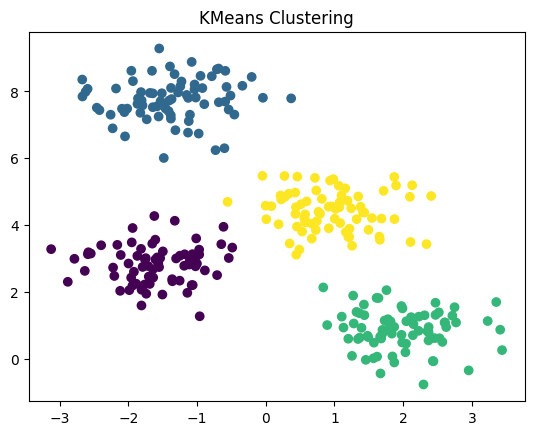

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# initiate a kmeans object with number of clusters
k_means = KMeans(n_clusters=4)
# fit the data to kmeans algorithm
k_means.fit(X)
# get the predicted cluster labels for each data point
labels = k_means.labels_

# plot the data points with different cluster labels for each cluster
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("KMeans Clustering")
plt.show()

## Apply Kmeans algorithm to diamanond dataset

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


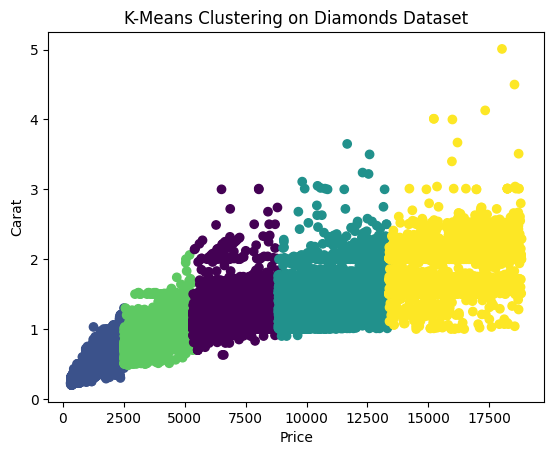

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

X = df[['price', 'carat']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_

# add predicted cluster label to original data set
df['cluster'] = labels

# plot the data points with different colors for different clusters
# sns.scatterplot(x="carat", y="price", hue="cluster", data=df, palette='Paired')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

<Axes: xlabel='cluster', ylabel='price'>

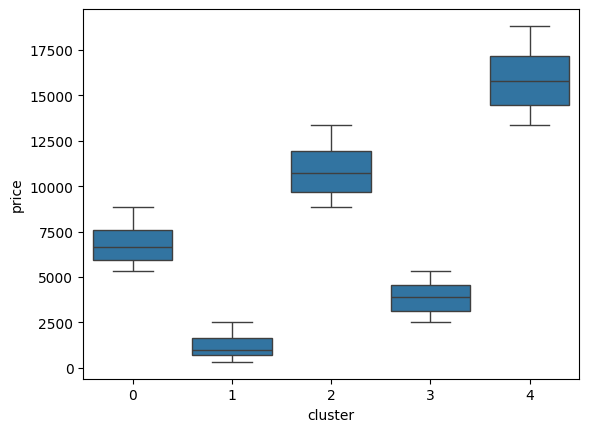

In [9]:
sns.boxplot(x='cluster', y='price', data=df)

## Model Evaluation

### Elbow Method

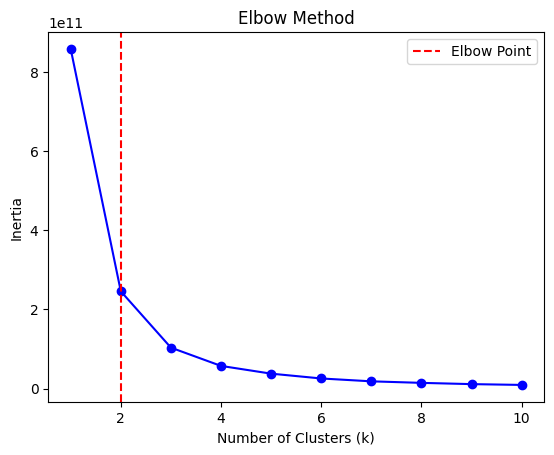

The best number of clusters based on the Elbow Method is: 2


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
#plt.show()

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)

### Silhoutte Method

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
# Find the best number of clusters based on the Silhouette Method
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Add a vertical line to indicate the best number of clusters
plt.axvline(x=best_k, color='r', linestyle='--', label='Best Number of Clusters')

plt.legend()
plt.show()

print("The best number of clusters based on the Silhouette Method is:", best_k)